In [58]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr 
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
import rasterio as rio

import earthpy as et
import earthpy.plot as ep


## Challenge 1: Open And Plot Hillshade
It’s time to practice your raster skills. Do the following:

Use the `pre_DTM_hill.tif` layer in the `colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar` directory.

Open the `pre_DTM_hill.tif` layer using `rioxarray`.
Plot the data using `ep.plot_bands()`.
Set the colormap (`cmap=`) parameter value to Greys: `cmap="gray"`
Give you plot a title.

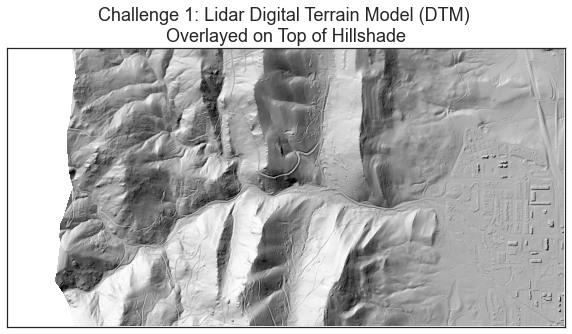

In [8]:
pre_dtm_hill = rxr.open_rasterio("data/data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif")

In [9]:
pre_dtm_hill.shape

(1, 2000, 4000)

(array([  49262.,   83406.,  285871.,  604703.,  850241., 1036743.,
        1915760., 1201834.,  641763., 1330417.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

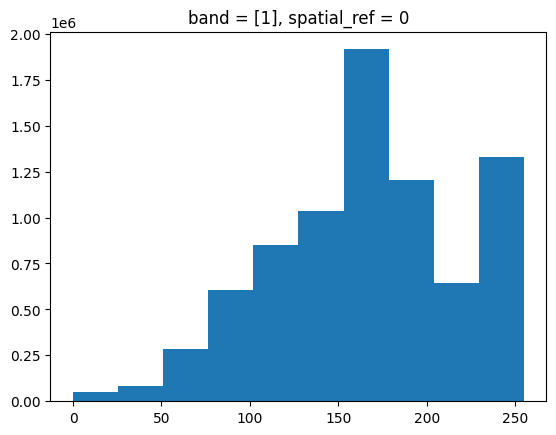

In [10]:
pre_dtm_hill.plot.hist()

Text(0.5, 1.0, 'Challeneg 1: Lidar Digital Terrain Model (DTM)\nOverlayed on Top of Hillshade')

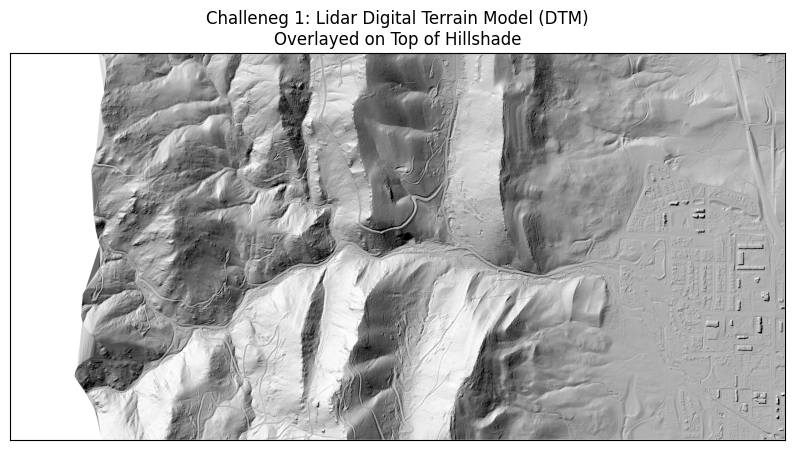

In [18]:
f, ax = plt.subplots(figsize=(10,8))
ep.plot_bands(pre_dtm_hill, cmap="gray", cbar=False, ax=ax)
ax.set_title("Challeneg 1: Lidar Digital Terrain Model (DTM)\nOverlayed on Top of Hillshade")

## Challenge 2: Overlay DTM Over DTM Hillshade
In the challenge above, you opened and plotted a hillshade of the lidar digital terrain model create from NEON lidar data before the 2013 Colorado Flood. In this challenge, you will use the hillshade to create a map that looks more 3-dimensional by overlaying the DTM data on top of the hillshade.

To do this, you will need to plot each layer using `ep.plot_bands()`

Plot the hillshade layer `pre_DTM_hill.tif` that you opened in Challenge 1. Similar to Challenge one set `cmap="gray"`
Plot the DTM that you opened above `dtm_pre_arr`
When you plot the DTM, use the alpha= parameter to adjust the opacity of the DTM so that you can see the shading on the hillshade underneath the DTM.
Set the colormap to viridis (or any colormap that you prefer) `cmap='viridis'` for the DTM layer.
HINT: be sure to use the `ax=` parameter to make sure both layers are on the same figure.

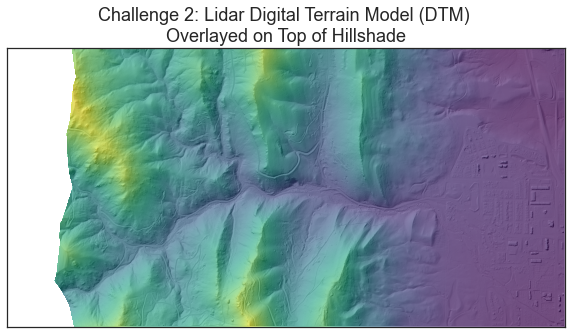

In [56]:
dem_pre_path = "./data/data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif"

(array([ 842272.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 7157728.]),
 array([-3.40282347e+38, -3.06254122e+38, -2.72225877e+38, -2.38197633e+38,
        -2.04169408e+38, -1.70141173e+38, -1.36112939e+38, -1.02084704e+38,
        -6.80564693e+37, -3.40282347e+37,  2.08742993e+03]),
 <BarContainer object of 10 artists>)

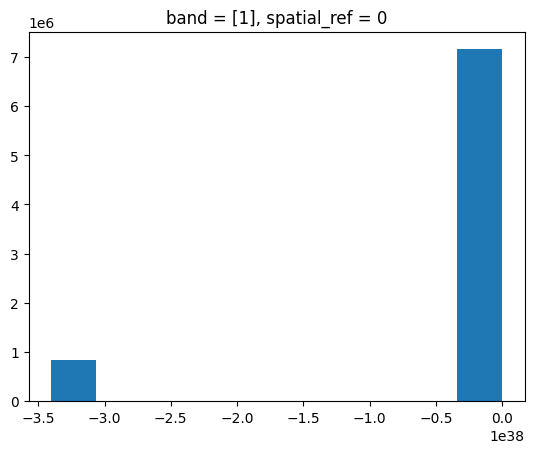

In [23]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr.plot.hist()

(array([1460307.,  755245.,  615365.,  837086., 1081310., 1135668.,
         687397.,  347037.,  179971.,   58342.]),
 array([1676.20996094, 1717.33190918, 1758.45397949, 1799.57592773,
        1840.69799805, 1881.81994629, 1922.94189453, 1964.06396484,
        2005.18591309, 2046.3079834 , 2087.42993164]),
 <BarContainer object of 10 artists>)

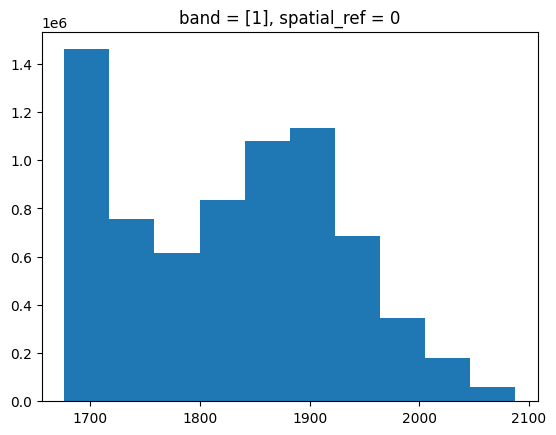

In [24]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True)
dtm_pre_arr.plot.hist()

In [29]:
dtm_pre_arr.shape

(1, 2000, 4000)

Text(0.5, 1.0, "I wanted to also plot it using cmap='magma'")

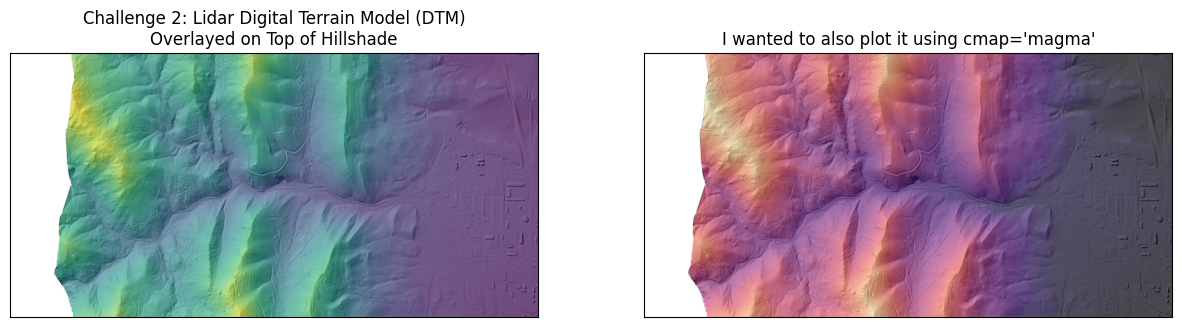

In [40]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,12))
ALPHA=0.6

# Their Plot
ep.plot_bands(pre_dtm_hill, cmap="gray", cbar=False, ax=ax[0])

ep.plot_bands(dtm_pre_arr, cmap="viridis", cbar=False, ax=ax[0], alpha=ALPHA)
ax[0].set_title("Challenge 2: Lidar Digital Terrain Model (DTM)\nOverlayed on Top of Hillshade")

# My plot
ep.plot_bands(pre_dtm_hill, cmap="gray", cbar=False, ax=ax[1])

# I usually really like magma, so I have plotted it twice so that I can also have my little plot.
ep.plot_bands(dtm_pre_arr, cmap="magma", cbar=False, ax=ax[1], alpha=ALPHA)
ax[1].set_title("I wanted to also plot it using cmap='magma'")

## Challenge 3: Add A Site Boundary to Your Raster Plot
Take all of the code that you wrote above to plot the DTM on top of your hillshade layer. Add the site boundary layer that you opened above `site_bound_shp` to your plot.

HINT: remember that the plotting_extent() object (lidar_dem_plot_ext) will be needed to add this final layer to your plot.

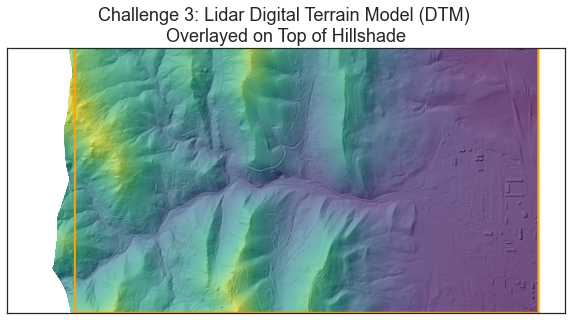

In [44]:
site_bound_shp = gpd.read_file("./data/data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp")

In [50]:
print(pre_dtm_hill.rio.crs,
dtm_pre_arr.rio.crs,
site_bound_shp.crs)

EPSG:32613 EPSG:32613 EPSG:32613


https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python/

In [59]:
with rio.open(dem_pre_path) as dem_src:
    # Create an object called lidar_dem_plot_ext that contains the spatial metadata
    lidar_dem_plot_ext = plotting_extent(dem_src)

# This plotting extent object will be used below to ensure your data overlay correctly
lidar_dem_plot_ext

(472000.0, 476000.0, 4434000.0, 4436000.0)

In [53]:
# plot_ext = plotting_extent(pre_dtm_hill, pre_dtm_hill.rio.transform())

Text(0.5, 1.0, 'Challenge 3: Lidar Digital Terrain Model (DTM)\nOverlayed on Top of Hillshade')

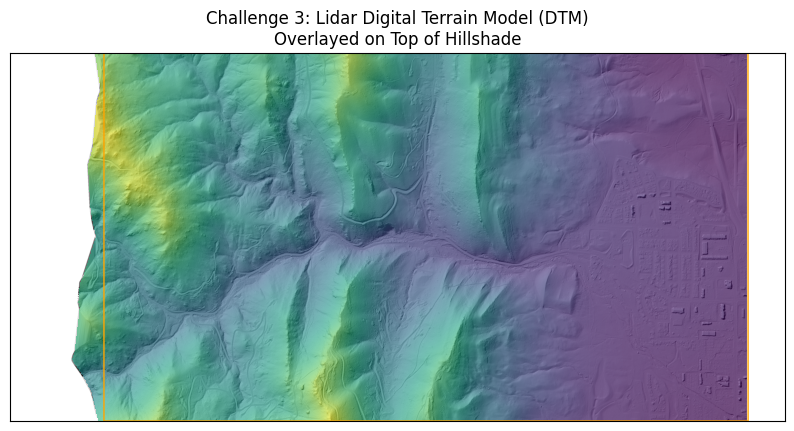

In [61]:
f, ax = plt.subplots(figsize=(10,8))
ALPHA=0.6

# Their Plot
ep.plot_bands(pre_dtm_hill, cmap="gray", cbar=False, ax=ax, extent=lidar_dem_plot_ext)

ep.plot_bands(dtm_pre_arr, cmap="viridis", cbar=False, ax=ax, alpha=ALPHA, extent=lidar_dem_plot_ext)

site_bound_shp.plot(ax=ax, facecolor="none", edgecolor="orange")
ax.set_title("Challenge 3: Lidar Digital Terrain Model (DTM)\nOverlayed on Top of Hillshade")

## Challenge 4 (Optional): Open Post Flood Raster
Above, you opened up a lidar derived Digital Terrain Model (DTM or DEM) that was created from data collected before the 2013 flood. In the post-flood directory, you will find a DTM containing data collected after the 2013 flood.

Create a figure with two plots.

In the first subplot, plot the pre-flood data that you opened above. In the second subplot, open and plot the post-flood DTM data. You wil find the file post_DTM.tif in the post-flood directory of your colorado-flood dataset downloaded using earthpy.

Add a super title (a title for the entire figure) using plt.suptitle("Title Here")
Adjust the location of your suptitle plt.tight_layout(rect=[0, 0.03, 1, 0.9])

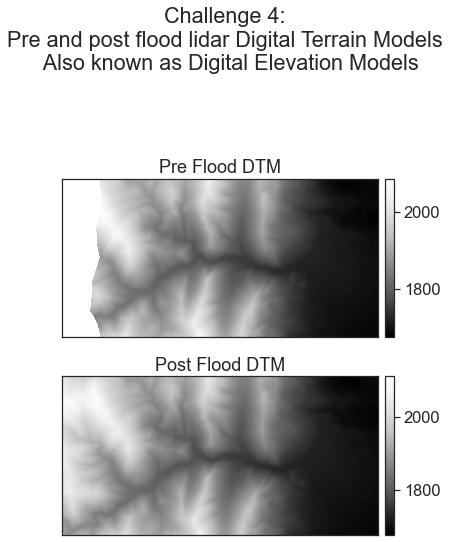

(array([1521947.,  759030.,  675599.,  944013., 1228384., 1195282.,
         718780.,  531062.,  334177.,   91726.]),
 array([1675.70996094, 1719.33496094, 1762.95996094, 1806.58496094,
        1850.20996094, 1893.83496094, 1937.45996094, 1981.08496094,
        2024.70996094, 2068.33496094, 2111.95996094]),
 <BarContainer object of 10 artists>)

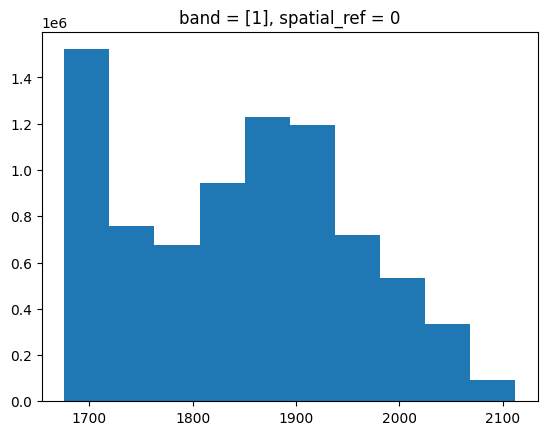

In [62]:
dtm_post_arr = rxr.open_rasterio("./data/data/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif")
dtm_post_arr.plot.hist()

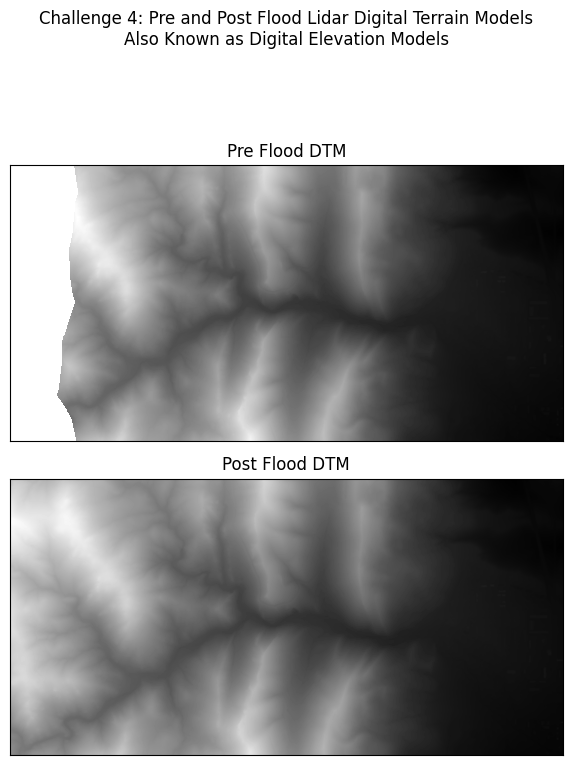

: 

In [67]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ep.plot_bands(dtm_pre_arr, cmap="gray", cbar=False, ax=ax[0])
ax[0].set_title("Pre Flood DTM")
ep.plot_bands(dtm_post_arr, cmap="gray", cbar=False, ax=ax[1])
ax[1].set_title("Post Flood DTM")

f.suptitle("Challenge 4: Pre and Post Flood Lidar Digital Terrain Models\nAlso Known as Digital Elevation Models")
plt.tight_layout(rect=[0, 0.03, 1, 0.9])